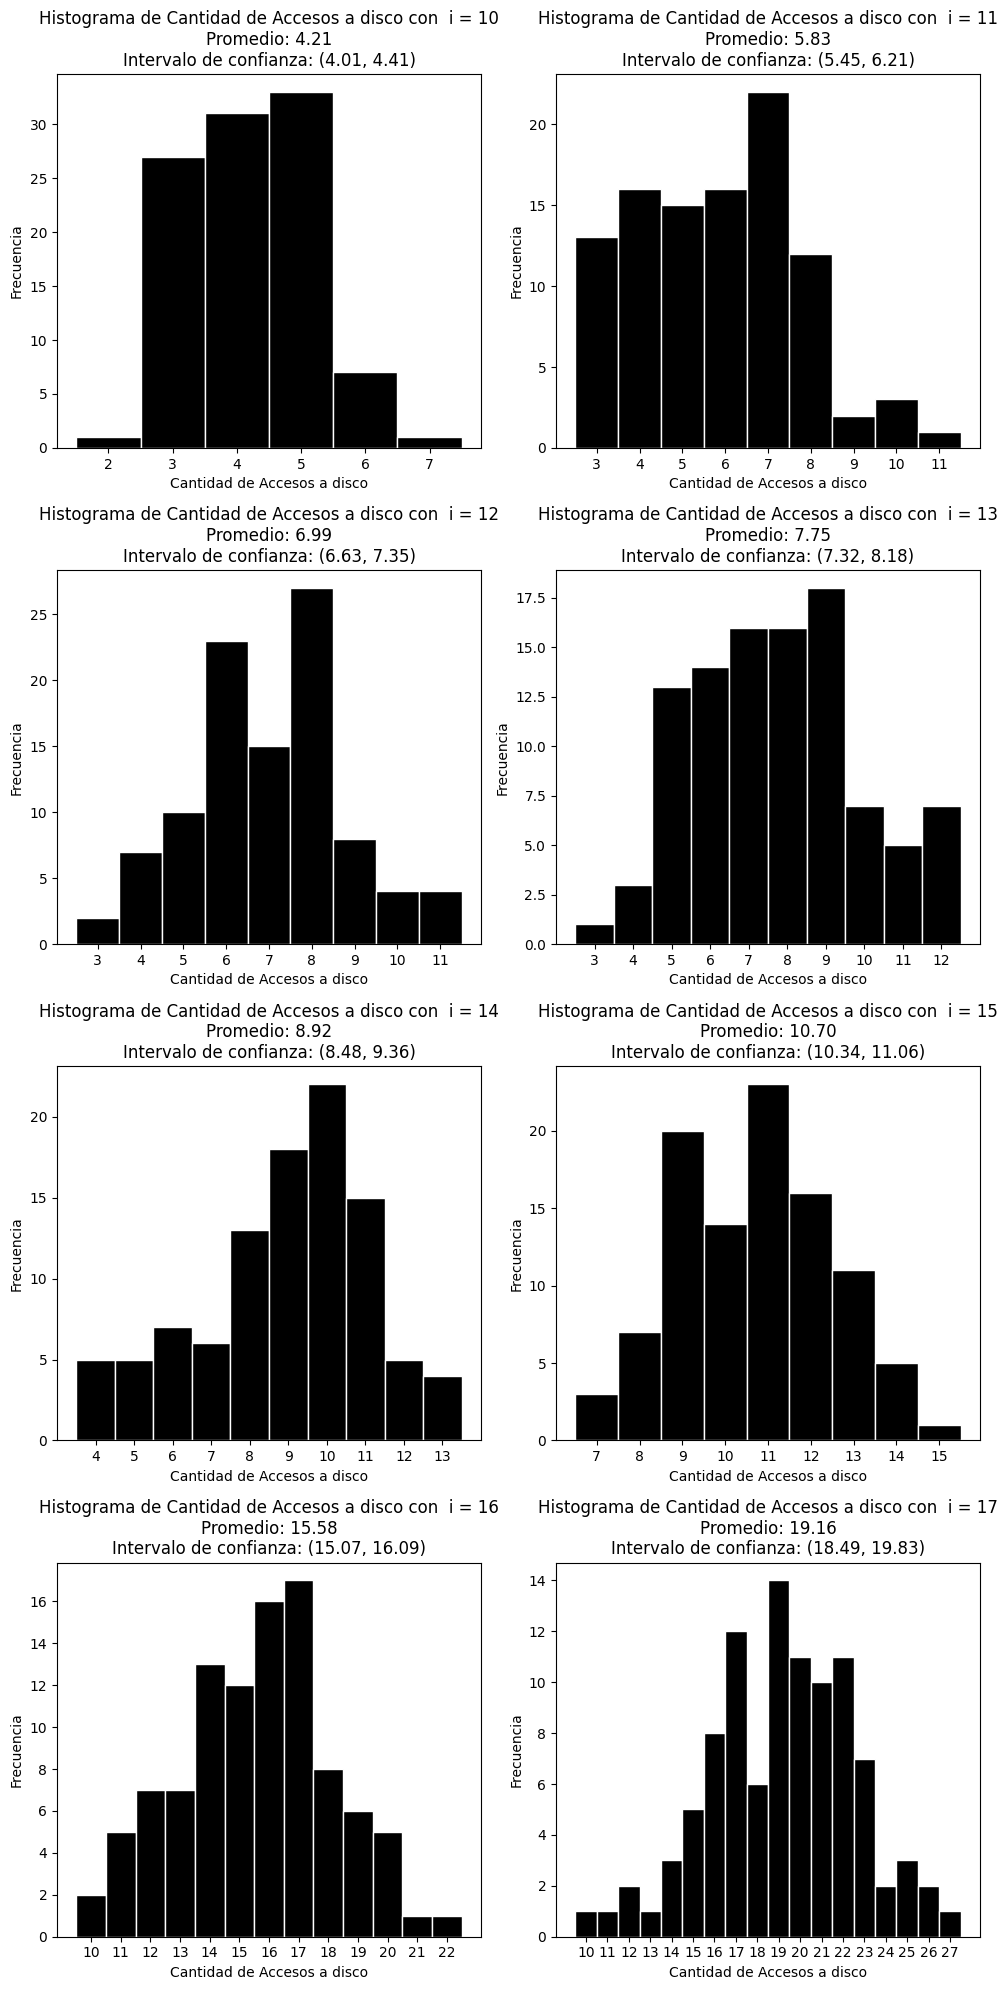

In [68]:
import re

average_disk_accesses = []
time_taken_to_build_optimized = []
time_taken_to_build_non_optimized = [3.49,20.23,197.08,2052,7877,48300,None,None]
all_disk_accesses = []

for i in range(10, 18):
    with open(f'resultados_ss_ {i}.txt', 'r') as file:
        for line in file:
            if 'Average disk accesses' in line:
                match = re.search('Average disk accesses : ([\d\.]+) Time taken to build: ([\d\.]+)seconds', line)
                average_disk_accesses.append(float(match.group(1)))
                time_taken_to_build_optimized.append(float(match.group(2)))
            elif 'All disk accesess' in line:
                match = re.search('All disk accesess : \[(.+)\]', line)
                accesses = list(map(int, match.group(1).split(', ')))
                all_disk_accesses.append(accesses)

import matplotlib.pyplot as plt

import numpy as np

import math
import scipy.stats as stats

n = len(all_disk_accesses)
cols = 2
rows = math.ceil(n / cols)

confidence_level = 0.95
confidence_intervals = []

for accesses in all_disk_accesses:
    degrees_freedom = len(accesses) - 1
    sample_mean = np.mean(accesses)
    sample_standard_error = stats.sem(accesses)
    confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
    confidence_intervals.append(confidence_interval)

fig, axs = plt.subplots(rows, cols, figsize=(10, 5*rows))

for i, accesses in enumerate(all_disk_accesses):
    row = i // cols
    col = i % cols
    ax = axs[row, col]
    bin_edges = np.arange(min(accesses)-0.5, max(accesses)+1.5)  # Ajusta los bordes de los bins
    ax.hist(accesses, bins=bin_edges, edgecolor='white',color= 'black')  # Pasa los bordes de los bins a plt.hist()
    mean = np.mean(accesses)
    ci = confidence_intervals[i]
    ax.set_title(f"Histograma de Cantidad de Accesos a disco con  i = {i+10}\nPromedio: {mean:.2f}\nIntervalo de confianza: ({ci[0]:.2f}, {ci[1]:.2f})")
    ax.set_xlabel("Cantidad de Accesos a disco")
    ax.set_ylabel("Frecuencia")
    ax.set_xticks(np.arange(min(accesses), max(accesses)+1))  # Ajusta las marcas en el eje x para que estén en los números enteros
    


# Elimina los subplots vacíos
if n % cols:
    for col in range(n % cols, cols):
        fig.delaxes(axs[rows-1, col])

plt.tight_layout()
plt.show()

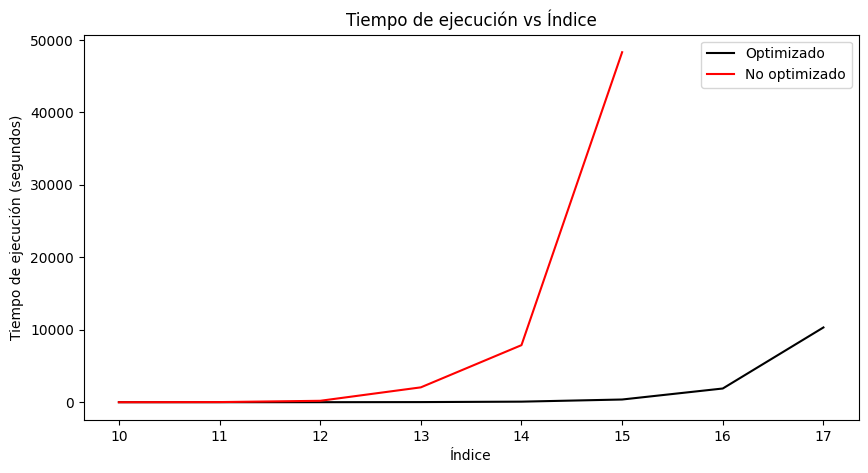

In [67]:
import numpy as np

indices = np.arange(10, 18)


plt.figure(figsize=(10, 5))
plt.plot(indices, time_taken_to_build_optimized, color='black', label='Optimizado')
plt.plot(indices, time_taken_to_build_non_optimized, color='red', label='No optimizado')

plt.title("Tiempo de ejecución vs Índice")
plt.xlabel("Índice")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()
plt.show()